<a href="https://colab.research.google.com/github/easyhardhoon/machine_learning/blob/master/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# x0, x1 양쪽의 편미분을 묶어서 동시에 계산하기. 이때 (__, __) 처럼 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 함
def numercial_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)
  for idx in range(x.size):
    tmp_val = x[idx]

    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
    # 변수가 하나일때의 수치 미분과 로직은 같음
  return grad
def function_2(x):
  return x[0]**2 + x[1]**2

In [ ]:
numercial_gradient(function_2, np.array([3.0,4.0]))
#각 점에서의 기울기. 벡터로 정리한 모양이다.  

array([6., 8.])

**기울기가 의미하는 것**
1. 일반적으로 기울기는 가장 낮은 장소르 가리킴. 
2. 반드시 기울기는 각 지점에서 낮아지는 방향을 가리킴
---> 기울기가 가리키는 쪽은 각 장소에서 함수의 출력을 가장 크게 줄이는 방향이다
이는 loss를 최대한 줄이는 최적의 알고리즘과 동일

---> 이렇듯 기울기를 이용하여 함수의 최솟값을 찾으려는 방법이 경사법임

기울기가 0인 부분을 찾으면 최적의 장소 (매개변수 수정 중지)를 찾은 것으로 간주.
하지만 기울이가 0인 부분이 항상 최솟값은 아니다 

ex) 극솟값 이거나 안장점 . 또는 끝없는 평지(고원)에  빠질 수 있음

그래도 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니지만 그 방향으로 가야 함수의 값을 줄일 수 있음.

그래서 기울기 정보를 단서로 나아갈 방향을 정해야 함

In [ ]:
# 경사법 : 현 위치에서 기울어진 방향으로 일정 거리만큼 이동. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고
# 또 기울어진 방향으로 나아감. 이렇게해서 함수의 값을 점차 줄이는 것이 경사법. 마찬가지로 기울기를 이용함. 
# 학습률 : 갱신하는 양. 한번의 학습으로 얼마만큼 학습해야 할지. 매개변수 값을 얼마나 갱신해야할지

def gradient_descent(f, init_x, lr=0.01, step_num = 100): #경사하강법 함수
  x = init_x
  for i in range(step_num):
    grad = numercial_gradient(f,x)
    x -= lr* grad
  return x
  #100번 x값 갱신. 기울기를 구한다음 학습률 값을 곱해 최대한 기울기가 0인 곳으로 도달한다. 극솟값을 구할 수 있다. 잘하면 최솟값도..!

In [ ]:
import numpy as np
def function_2(x):
  return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])
#gradient_descent(function_2,init_x)
gradient_descent(function_2, init_x, 0.1, 100)
# 학습률 0.1, 100번 반복하여 기울기 기반 기울기가 0인 곳으로 최대한 도달한 결과값. 극솟값. 혹은 최솟값
# 실제 최솟값은 (0,0)임 . 결과와 거의 일치하는 모습을 보인다.

array([-6.11110793e-10,  8.14814391e-10])

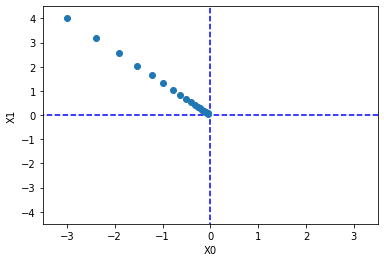

In [ ]:
# 위 코드를 가시화하기 위해 복사해온 코드입니다.
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

이렇게 경사법을 이용해 최솟값을 탐색함.
가장 값이 낮은 장소인 원점을 향해 가까워지고 있는 모습.
함수의 최솟값 탐색인데, 이떄 함수로 loss함수를 사용하는듯. 

흔한 loss함수에는 오차제곱합, 교차 엔트로피 오차가 있다.

학습률
학습률 값은 0.01 이나 0.001 등 미리 정해두어야 함
이 값이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없음.

신경망 학습에서는 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행함

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100): #경사하강법 함수
  x = init_x
  for i in range(step_num):
    grad = numercial_gradient(f,x)
    x -= lr* grad
  return x
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, 10.0, 100))
#학습률이 너무 크면 큰 값으로 발산
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, 1e-10, 100))
#학습률이 너무 작으면 거의 갱신이 안되는 모습
# 0,0 이 이상적 최솟값임

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


하이퍼 파라미터 : 사람이 직접 설정  ex) 학습률 같은 매개변수

일반 파라미터 : 훈련 데이터와 알고리즘으로 자동 획득 ex) 가중치, 편향 같은 신경망의 매개변수

하이퍼 파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거친다

In [ ]:
#신경망 학습에서의 기울기 : 가중치 매개변수에 대한 손실 함수의 기울기. 미분 하기 전 W와 미분 한 후 값인 dL/dw 의 형상은 같다
import sys, os
sys.path.append(os.pardir)
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) # 표준정규분포로 부터 난수 추출. 2 * 3 형상으로 
  def predict(self,x):
    return np.dot(x,self.W)
  def loss(self, x, t): # x는 입력 데이터, t는 정답 레이블
    z= self.predict(x)
    y = softmax(z) # 활성화함수까지 돌린 결과값
    loss = cross_entropy_error(y,t) #이 값 토대로 loss 값 계산. loss 함수로 교차엔트로피오차를 쓴 모습
    return loss


In [ ]:
net = simpleNet()
net.W #가중치 매개변수 2* 3 shape

array([[ 1.56788856,  0.00751605, -0.20807839],
       [-0.56301546, -0.53786102, -0.07215984]])

In [ ]:
x = np.array([0.6,0.9])
p = net.predict(x)
p

array([ 0.43401922, -0.47956529, -0.18979089])

In [ ]:
np.argmax(p)

0

In [ ]:
t = np.array([0,0,1]) # 복습. 입력 인수 ( 1 * 2), 가중치 매개변수 ( 2 * 3 ) ---> 결과예측값, 정답레이블 ( 1 * 3) 행렬곱 형상의 원칙
net.loss(x,t)

1.2849411845493006

In [ ]:
# 이제 편미분을 통해 기울기를 구해보기 .  
# numerical_gradient의 인수 f, x 에 주목. 사실상 x는 f의 인수이다. 내부 구현에서 f(x)이렇게 실행이 됌
def f(W):
  return net.loss(x,t)  #  f = lambda W : net.loss(x,t) 로 간단히 쓸 수 있음
dW = numerical_gradient(f, net.W) 
# 아까의 가설이 맞음. 결국 편미분 대상 함수는 loss함수이다. 결국 가중치 매개변수에 대한 손실 함수의 기울기를 구하는게 목적
dW
# dW와 미분전 net.W의 형상은  같다

array([[ 0.30976002,  0.12423977, -0.43399979],
       [ 0.46464003,  0.18635966, -0.65099968]])

#해석
dW는 편미분의 결과. 2 * 3 배열.

dw(11) 의 값은 대략 0.3 ---> w11을 h만큼 늘리면 함수(손실함수)는 0.3h만큼 증가한다. 

dw(23) 의 값은 대략 -0.6 ---> w23을 h만큼 늘리면 함수(손실함수)는 -0.6h만큼 감소한다.
 
#손실함수를 줄인다는 관점 으로 보면 
w23은 양의 방향으로 갱신해야하고 (잘하고 있으니)

w11은 음의 방향으로 갱신해야함을 알 수 있다. (반대로 가야지)


현재까지는 신경망의 기울기 값을 통해 함수(loss)의 최솟값 추정 좌표를 찾는 과정이었다. 이젠 이를 이용해 경사볍에 따라 가중치 매개변수 (W)의 갱신만 남았다.
#사실
신경망의 기울기는 가중치 매개변수에 대한 손실함수의 기울기이다. 즉 numercial_gradient(f,net.W)와 추후 gradient_descent(경사법)으로 loss함수에
        대한 w매개변수로 해석할 수 있다. 즉 numbercial_gradient 결과값의 +-방향대로 w매개변수의 수정을 거치는게 바로 경사법에 따른 가중치 매개변수의 갱신이다"

쉽게 말해 이론적인 편미분 함수의 인자에 손실함수와 가중치매개변수를 넣는거임.

x 좌표의 갱신이 아니고 weight 가중치 매개변수의 갱신임
